# HealthApp Logs analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("HealthApp_2k.log_structured.csv")

In [3]:
df.sample(10)

,LineId,Time,Component,Pid,Content,EventId,EventTemplate
1223,1224,20171223-22:55:55:733,Step_LSC,30002312,processHandleBroadcastAction action:android.in...,E43,processHandleBroadcastAction action:android.in...
418,419,20171223-22:17:45:668,Step_ExtSDM,30002312,calculateAltitudeWithCache totalAltitude=240,E3,calculateAltitudeWithCache totalAltitude=<*>
542,543,20171223-22:17:56:651,Step_SPUtils,30002312,setTodayTotalDetailSteps=1514038560000##7106##...,E58,setTodayTotalDetailSteps=<*>
289,290,20171223-22:15:55:359,Step_LSC,30002312,onExtend:1514038556000 2 0 4,E39,onExtend:<*> <*> <*> <*>
1826,1827,20171224-0:5:0:128,Step_LSC,30002312,processHandleBroadcastAction action:android.in...,E44,processHandleBroadcastAction action:android.in...
1057,1058,20171223-22:39:25:301,Step_LSC,30002312,processHandleBroadcastAction action:android.in...,E43,processHandleBroadcastAction action:android.in...
10,11,20171223-22:15:29:649,Step_StandReportReceiver,30002312,REPORT : 7007 5002 150089 240,E47,REPORT : <*> <*> <*> <*>
1077,1078,20171223-22:44:0:47,Step_LSC,30002312,processHandleBroadcastAction action:android.in...,E44,processHandleBroadcastAction action:android.in...
41,42,20171223-22:15:32:340,Step_LSC,30002312,onStandStepChanged 3585,E42,onStandStepChanged <*>
1964,1965,20171224-0:28:25:151,Step_LSC,30002312,onStandStepChanged 3786,E42,onStandStepChanged <*>


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   LineId         2000 non-null   int64 
 1   Time           2000 non-null   object
 2   Component      2000 non-null   object
 3   Pid            2000 non-null   int64 
 4   Content        2000 non-null   object
 5   EventId        2000 non-null   object
 6   EventTemplate  2000 non-null   object
dtypes: int64(2), object(5)
memory usage: 109.5+ KB


In [5]:
print("Null Values")
print(df.isnull().sum())

Null Values
LineId           0
Time             0
Component        0
Pid              0
Content          0
EventId          0
EventTemplate    0
dtype: int64


In [6]:
print("Descriptive Statistics in Numerical columns:")
print(df.describe())


Descriptive Statistics in Numerical columns:
            LineId         Pid
count  2000.000000      2000.0
mean   1000.500000  30002312.0
std     577.494589         0.0
min       1.000000  30002312.0
25%     500.750000  30002312.0
50%    1000.500000  30002312.0
75%    1500.250000  30002312.0
max    2000.000000  30002312.0


In [7]:
# number of unique values for each column.
columns_lst = list(df.columns)
for i in columns_lst:
    print(i,": ",df[i].nunique())

LineId :  2000
Time :  1711
Component :  20
Pid :  1
Content :  1179
EventId :  75
EventTemplate :  75


In [8]:
# Convert 'Time' 
df['Time'] = pd.to_datetime(df['Time'], format='%Y%m%d-%H:%M:%S:%f')

In [9]:
# Extract date and time 
df['Date'] = df['Time'].dt.date
df['Hour'] = df['Time'].dt.hour

In [10]:
df.head()

,LineId,Time,Component,Pid,Content,EventId,EventTemplate,Date,Hour
0,1,2017-12-23 22:15:29.606,Step_LSC,30002312,onStandStepChanged 3579,E42,onStandStepChanged <*>,2017-12-23,22
1,2,2017-12-23 22:15:29.615,Step_LSC,30002312,onExtend:1514038530000 14 0 4,E39,onExtend:<*> <*> <*> <*>,2017-12-23,22
2,3,2017-12-23 22:15:29.633,Step_StandReportReceiver,30002312,onReceive action: android.intent.action.SCREEN_ON,E41,onReceive action: android.intent.action.SCREEN_ON,2017-12-23,22
3,4,2017-12-23 22:15:29.635,Step_LSC,30002312,processHandleBroadcastAction action:android.in...,E43,processHandleBroadcastAction action:android.in...,2017-12-23,22
4,5,2017-12-23 22:15:29.635,Step_StandStepCounter,30002312,flush sensor data,E12,flush sensor data,2017-12-23,22


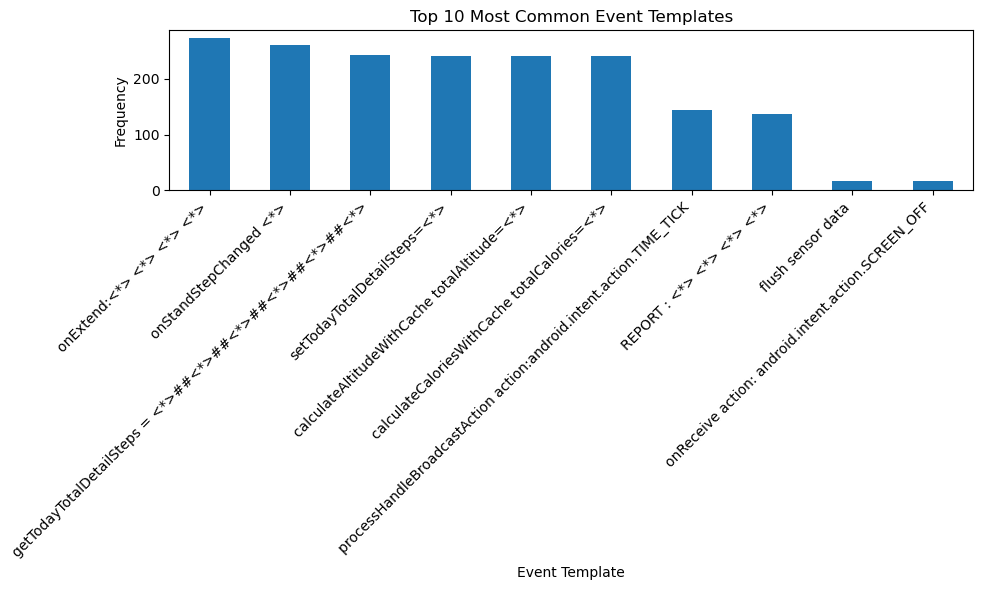

In [11]:
event_counts = df['EventTemplate'].value_counts().head(10)

plt.figure(figsize=(10, 6))
event_counts.plot(kind='bar')
plt.title('Top 10 Most Common Event Templates')
plt.xlabel('Event Template')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


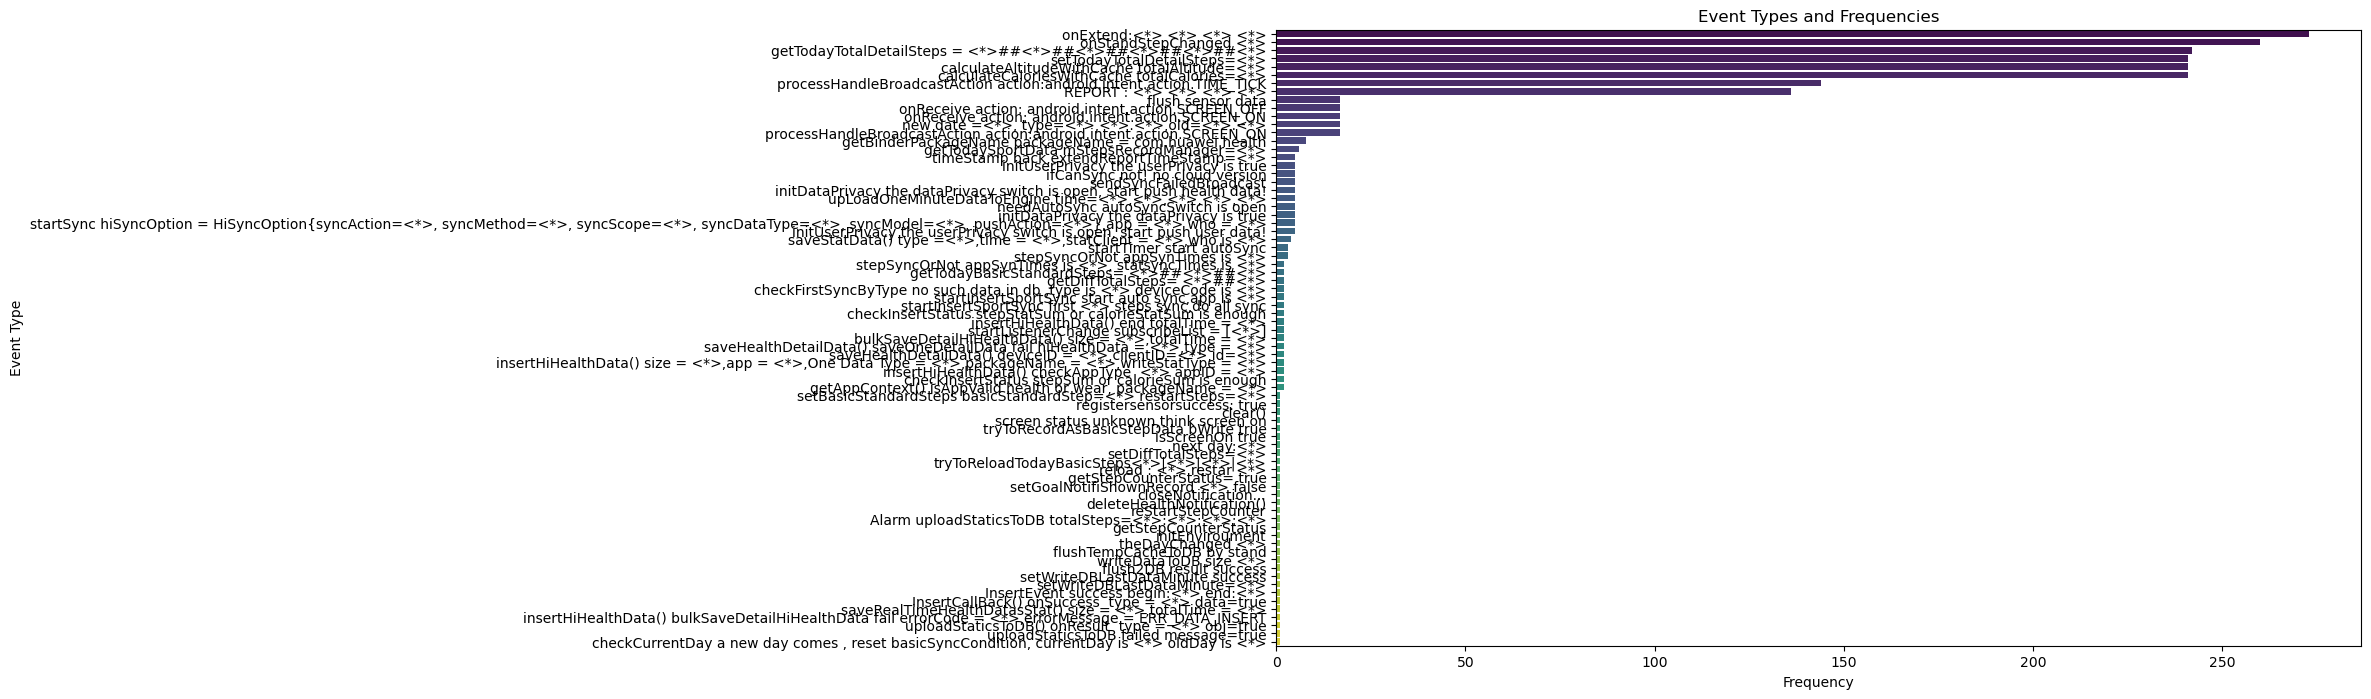

In [12]:
event_types = df['EventTemplate'].unique()
plt.figure(figsize=(14, 8))
sns.countplot(y='EventTemplate', data=df, order=df['EventTemplate'].value_counts().index, palette='viridis')
plt.title('Event Types and Frequencies')
plt.xlabel('Frequency')
plt.ylabel('Event Type')
plt.show()

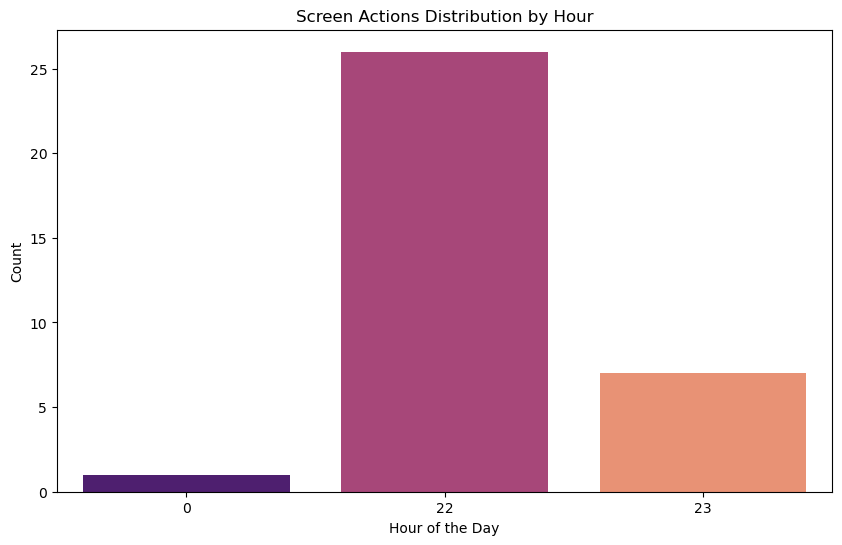

In [13]:
# chart for screen actions
screen_actions = df[df['EventTemplate'].str.contains('onReceive action: android.intent.action.SCREEN_')]
plt.figure(figsize=(10, 6))
sns.countplot(x='Hour', data=screen_actions, palette='magma')
plt.title('Screen Actions Distribution by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Count')
plt.show()

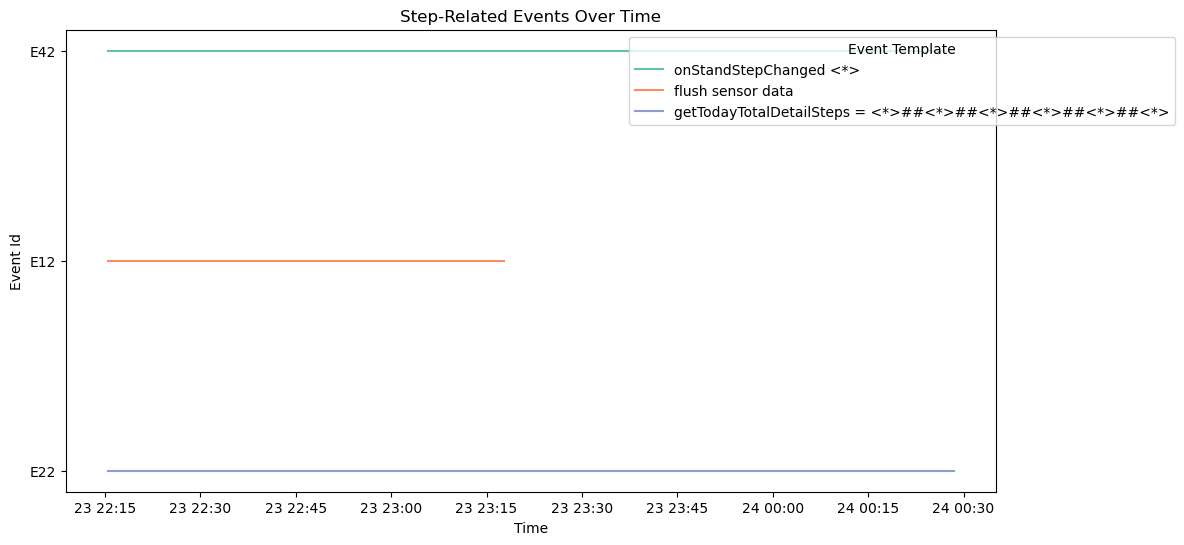

In [14]:
# Analyze step-related events
step_events = df[df['EventTemplate'].str.contains('onStandStepChanged|flush sensor data|getTodayTotalDetailSteps')]
plt.figure(figsize=(12, 6))
sns.lineplot(x='Time', y='EventId', data=step_events, hue='EventTemplate', palette='Set2')
plt.title('Step-Related Events Over Time')
plt.xlabel('Time')
plt.ylabel('Event Id')
plt.legend(title='Event Template', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()

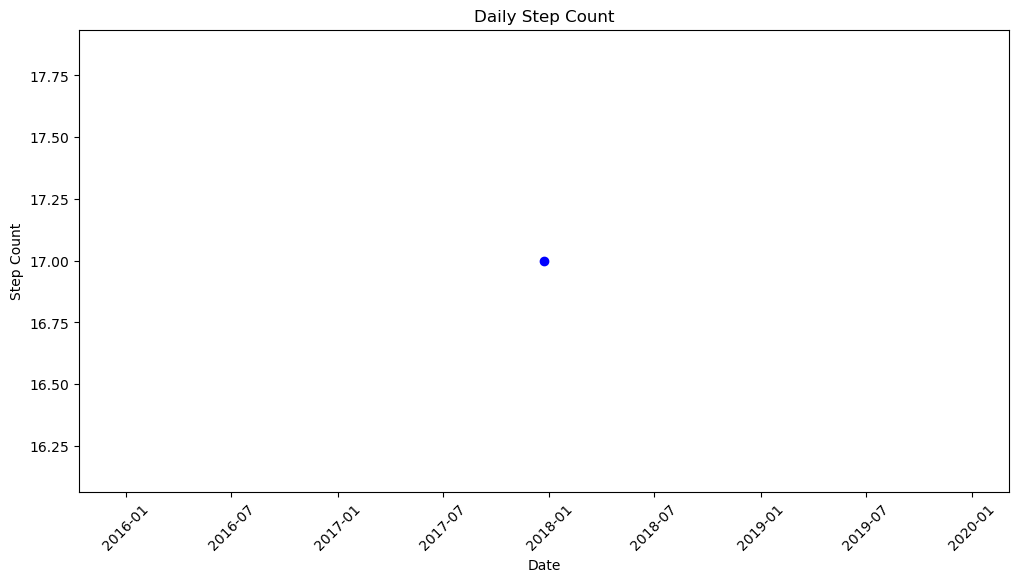

In [15]:
# Analyze daily step count
daily_steps = df[df['EventTemplate'].str.contains('flush sensor data')]
daily_steps_count = daily_steps.groupby('Date').size()

# Plot daily step count
plt.figure(figsize=(12, 6))
daily_steps_count.plot(marker='o', linestyle='-', color='b')
plt.title('Daily Step Count')
plt.xlabel('Date')
plt.ylabel('Step Count')
plt.xticks(rotation=45)
plt.show()

C:\Users\user\anaconda3\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1401: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)


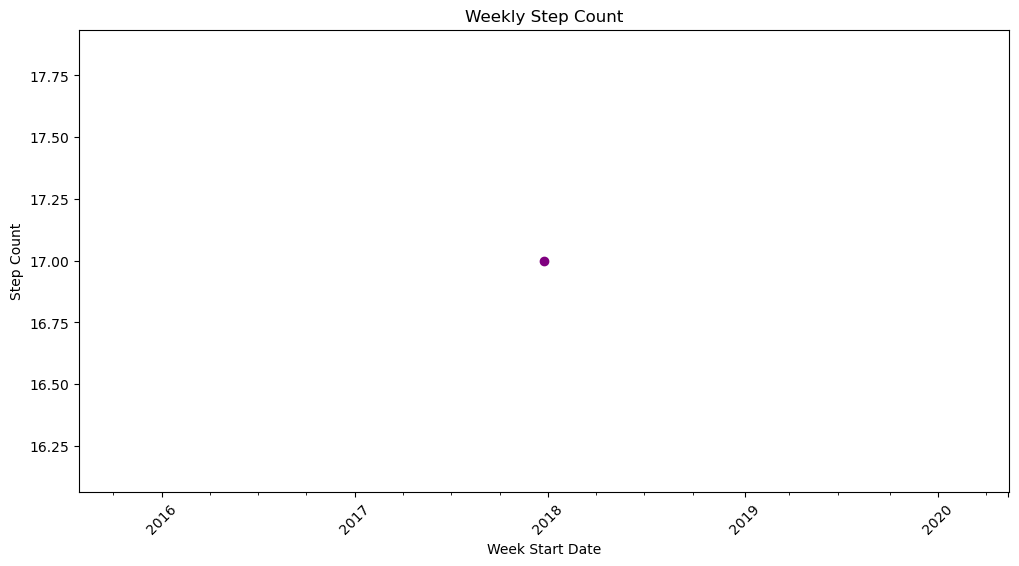

In [16]:
# Analyze weekly step count
weekly_steps_count = daily_steps.resample('W-Mon', on='Time').size()

# Plot weekly step count
plt.figure(figsize=(12, 6))
weekly_steps_count.plot(marker='o', linestyle='-', color='purple')
plt.title('Weekly Step Count')
plt.xlabel('Week Start Date')
plt.ylabel('Step Count')
plt.xticks(rotation=45)
plt.show()

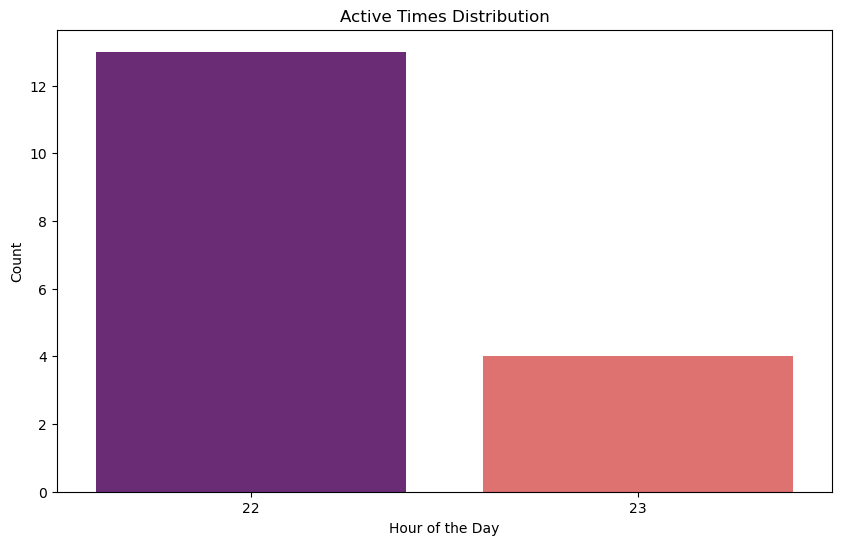

In [17]:
# Analyze active times
active_times = df[df['EventTemplate'].str.contains('onReceive action: android.intent.action.SCREEN_ON')]

# Plot active times
plt.figure(figsize=(10, 6))
sns.countplot(x='Hour', data=active_times, palette='magma')
plt.title('Active Times Distribution')
plt.xlabel('Hour of the Day')
plt.ylabel('Count')
plt.show()


In [18]:
# Identify the most active day
most_active_day = daily_steps_count.idxmax()
print(f"\nThe most active day is {most_active_day} with {daily_steps_count.max()} steps.")



The most active day is 2017-12-23 with 17 steps.


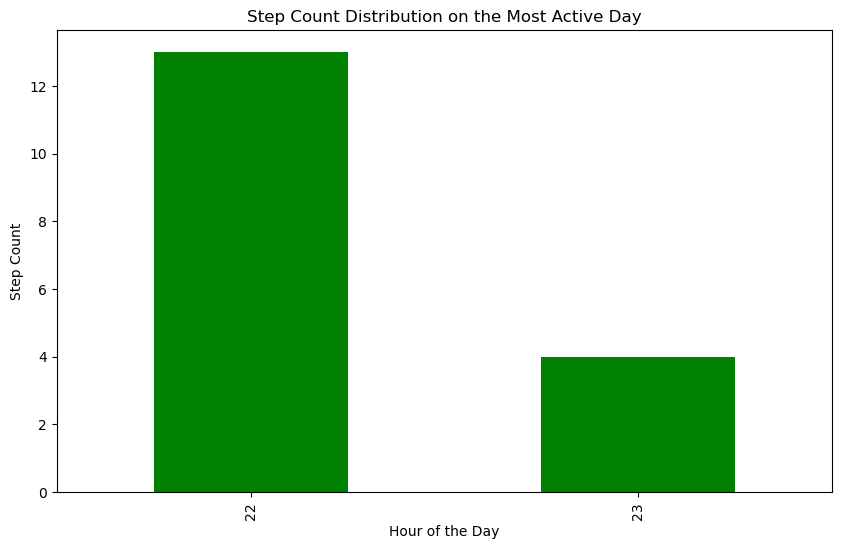

In [19]:
# Analyze step count on the most active day
most_active_day_steps = daily_steps[daily_steps['Date'] == most_active_day]
most_active_day_steps_count = most_active_day_steps.groupby('Hour').size()
plt.figure(figsize=(10, 6))
most_active_day_steps_count.plot(kind='bar', color='g')
plt.title('Step Count Distribution on the Most Active Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Step Count')
plt.show()

In [20]:
# Identify the average step count per day
average_steps_per_day = daily_steps_count.mean()
print(f"\nThe average step count per day is {average_steps_per_day:.2f} steps.")



The average step count per day is 17.00 steps.


In [21]:

# Identify the total step count during the entire period
total_steps = daily_steps_count.sum()
print(f"\nThe total step count during the entire period is {total_steps} steps.")


The total step count during the entire period is 17 steps.


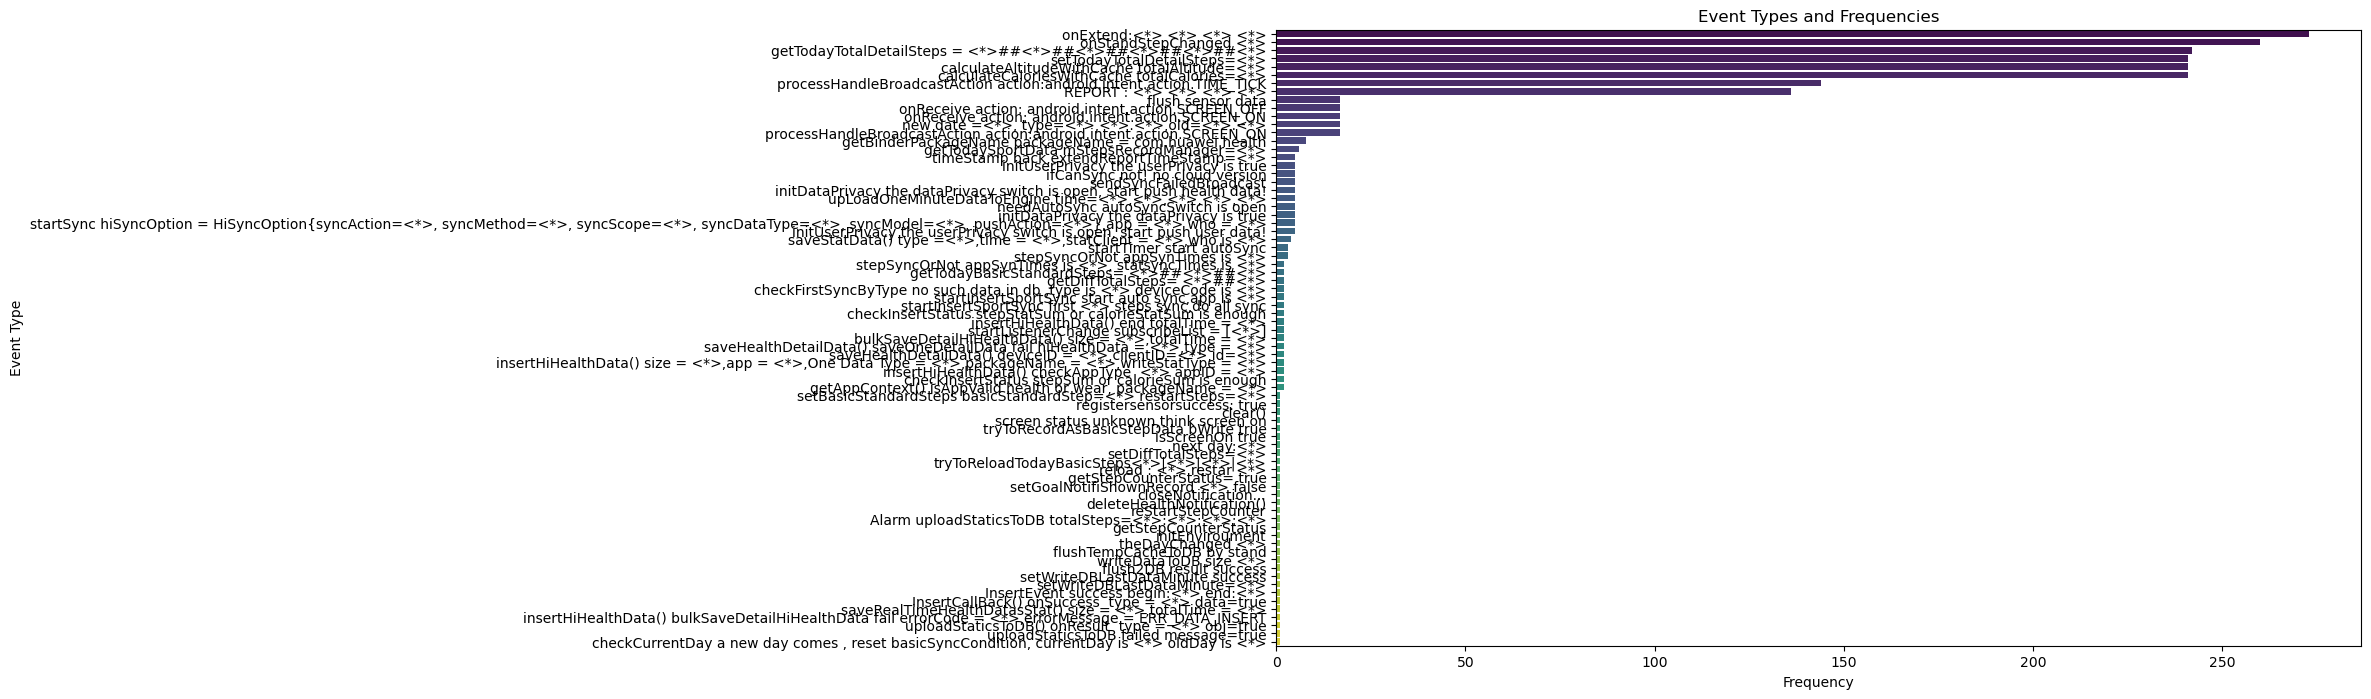

In [22]:
event_types = df['EventTemplate'].unique()

# Create a bar chart for event types and their frequencies
plt.figure(figsize=(14, 8))
sns.countplot(y='EventTemplate', data=df, order=df['EventTemplate'].value_counts().index, palette='viridis')
plt.title('Event Types and Frequencies')
plt.xlabel('Frequency')
plt.ylabel('Event Type')
plt.show()


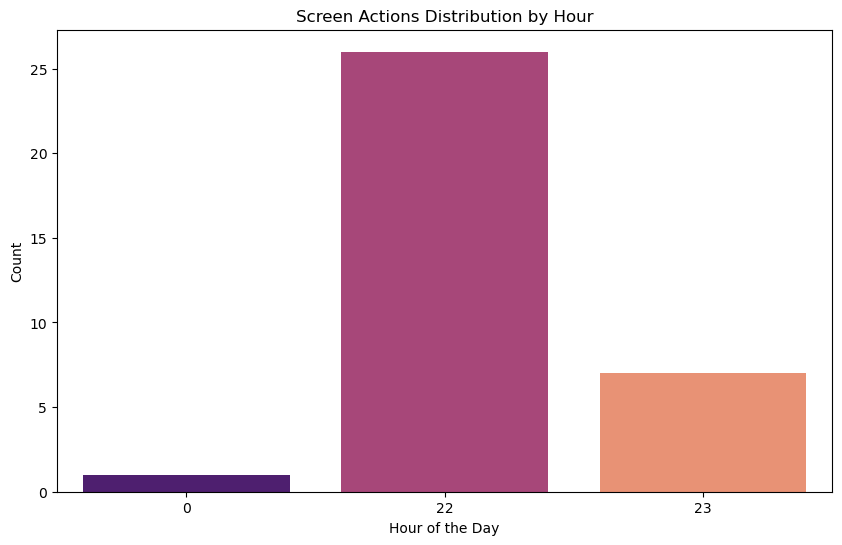

In [23]:

# Create a bar chart for screen actions
screen_actions = df[df['EventTemplate'].str.contains('onReceive action: android.intent.action.SCREEN_')]
plt.figure(figsize=(10, 6))
sns.countplot(x='Hour', data=screen_actions, palette='magma')
plt.title('Screen Actions Distribution by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Count')
plt.show()

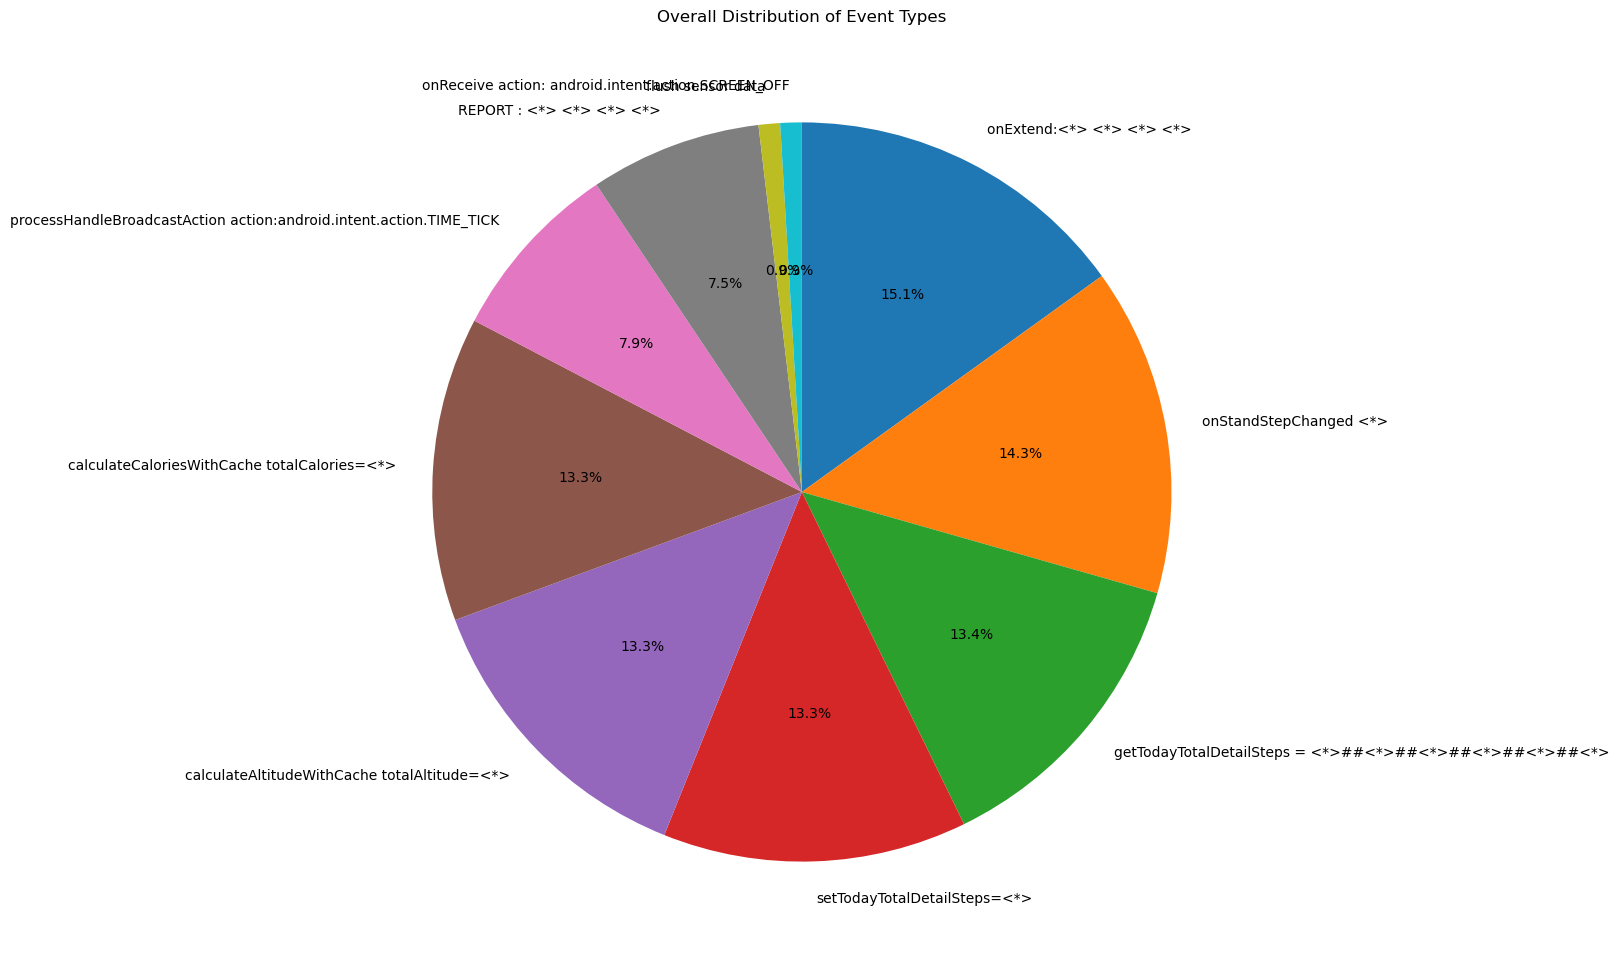

In [24]:
# Pie chart for the overall distribution of event types
plt.figure(figsize=(12, 12))
plt.pie(event_counts, labels=event_counts.index, autopct='%1.1f%%', startangle=90, counterclock=False)
plt.title('Overall Distribution of Event Types')
plt.show()


# Overview of the Data:

#### The dataset contains information about user activities recorded by the HealthApp.
* No Missing Values:
There are no missing values in the dataset. Each entry has information for all its columns.

* Descriptive Statistics:
Descriptive statistics provide a summary of numerical columns, giving us an idea about the range and distribution of values.

* Common Event Types:
The most common event types in the dataset include various activities like step changes, screen actions, and specific app-related events.

* Event Type Distribution:
We visualized the distribution of different event types. Some events occur more frequently than others, helping us understand
user interactions.

* Screen Actions by Hour:
We explored when users engage with their screens the most during the day, providing insights into device usage patterns.

* Step-Related Events Over Time:
We analyzed step-related events over time, identifying trends and patterns in the recorded steps and related activities.

* Daily and Weekly Step Counts:
Daily and weekly step counts help us understand the user's physical activity levels and any recurring patterns.

* Active Times Distribution:
We visualized the distribution of active times, indicating when users are most active throughout the day.

* Most Active Day:
The most active day is 2017-12-23 with 17 steps.

* Average and Total Step Counts:
The average step count per day is 17.00 steps.

* Overall Event Type Distribution:
We summarized the overall distribution of event types using a pie chart.
In simple terms, the analysis helps us understand when users are most active, how many steps they take daily and weekly, and the types of activities recorded by the HealthApp. This information can be valuable for both users and app developers to improve health tracking and user experience.